In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import string

In [2]:
# Download NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df = pd.read_csv('True.csv')
df2 = pd.read_csv('Fake.csv')

In [4]:
df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
# Load dataset
df['label'] = 'real'
df2['label'] = 'fake'
data = pd.concat([df, df2], ignore_index=True)

In [6]:
# Shuffle the dataset
data = data.sample(frac=1).reset_index(drop=True)

In [7]:
# Basic info
print(data.info())
print(data['label'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB
None
label
fake    23481
real    21417
Name: count, dtype: int64


In [8]:
data['label'].value_counts()

,count
label,
fake,23481
real,21417


<ipython-input-9-afb4d3911d86>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='label', palette='Set2')


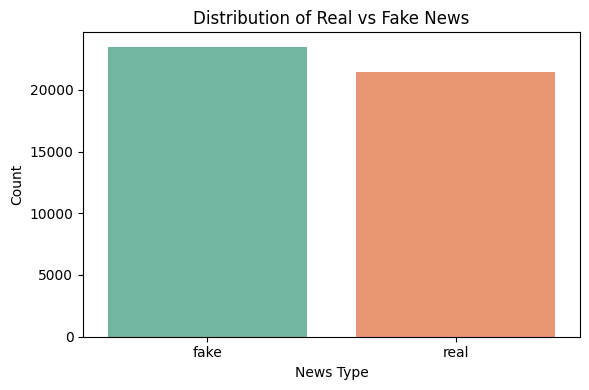

In [9]:
_# Plot class distribution
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='label', palette='Set2')
plt.title("Distribution of Real vs Fake News")
plt.xlabel("News Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [10]:
# Add length of text feature
data['text_length'] = data['text'].apply(len)

In [11]:
avg_lengths = data.groupby('label')['text_length'].mean()
print("Average Text Length:")
print(avg_lengths)

Average Text Length:
label
fake    2547.396235
real    2383.278517
Name: text_length, dtype: float64


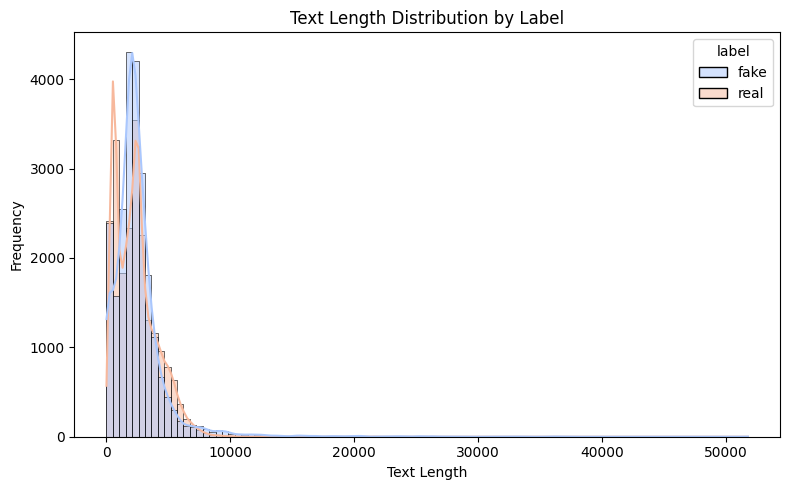

In [12]:
# Plot text length distribution
plt.figure(figsize=(8,5))
sns.histplot(data=data, x='text_length', hue='label', bins=100, kde=True, palette='coolwarm')
plt.title("Text Length Distribution by Label")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [13]:
# Generate WordCloud for fake news
fake_text = ' '.join(df['text'].astype(str))
real_text = ' '.join(df2['text'].astype(str))

In [14]:
def clean_text(text):
    tokens = text.lower().split()
    tokens = [t for t in tokens if t not in stop_words and t not in string.punctuation]
    return " ".join(tokens)

In [15]:
fake_cleaned = clean_text(fake_text)
real_cleaned = clean_text(real_text)

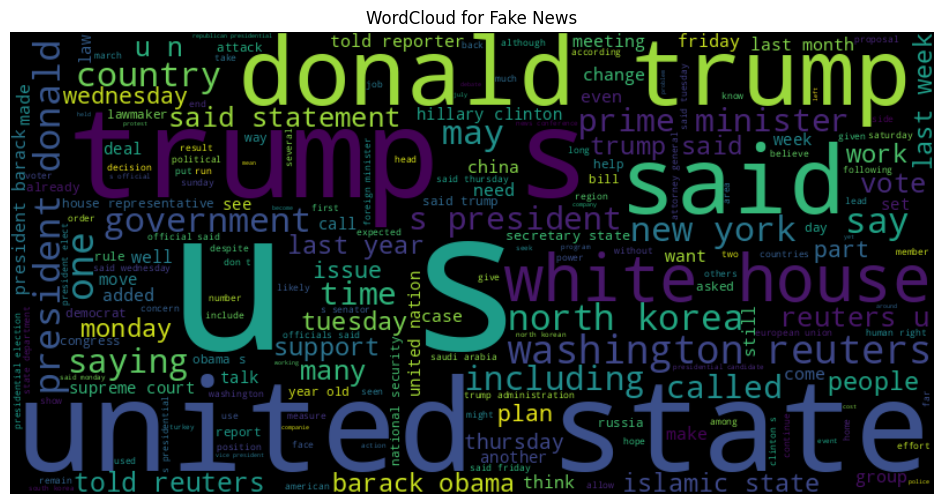

In [16]:
plt.figure(figsize=(12,6))
wc_fake = WordCloud(width=800, height=400, background_color='black').generate(fake_cleaned)
plt.imshow(wc_fake, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud for Fake News")
plt.show()

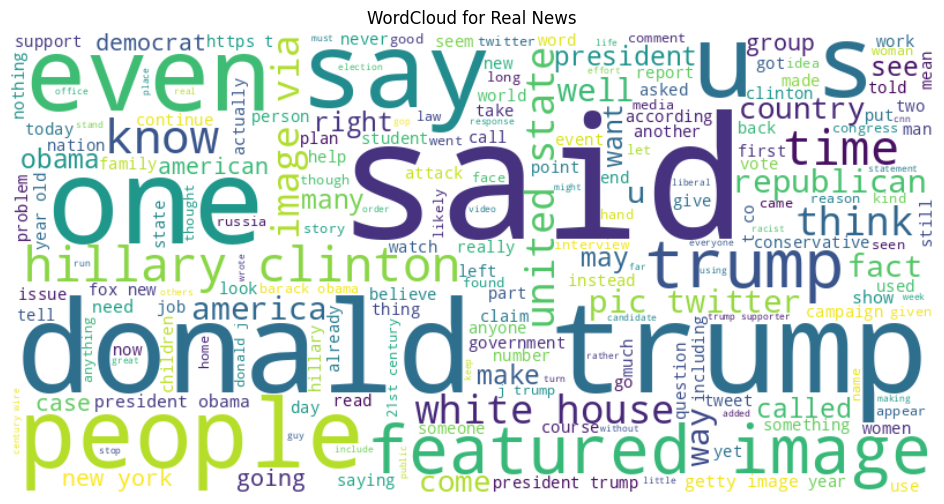

In [17]:
plt.figure(figsize=(12,6))
wc_real = WordCloud(width=800, height=400, background_color='white').generate(real_cleaned)
plt.imshow(wc_real, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud for Real News")
plt.show()

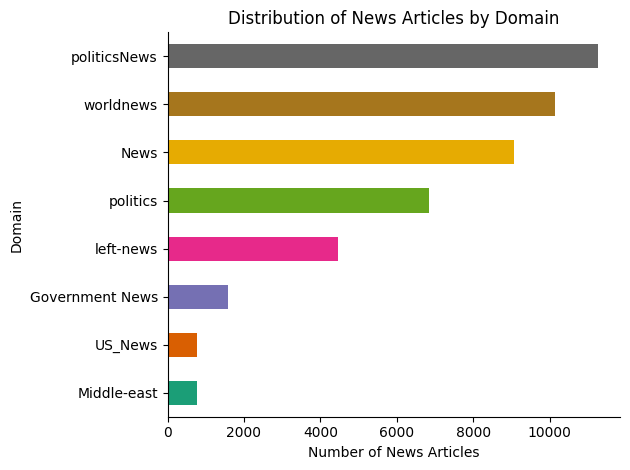

In [18]:
# Count articles per domain and sort by count
domain_counts = data.groupby('subject').size().sort_values(ascending=True)

# Plot horizontal bar chart
domain_counts.plot(kind='barh', color=sns.color_palette('Dark2'))

# Remove top and right borders
plt.gca().spines[['top', 'right']].set_visible(False)

# Add labels
plt.xlabel('Number of News Articles')
plt.ylabel('Domain')
plt.title('Distribution of News Articles by Domain')

plt.tight_layout()
plt.show()

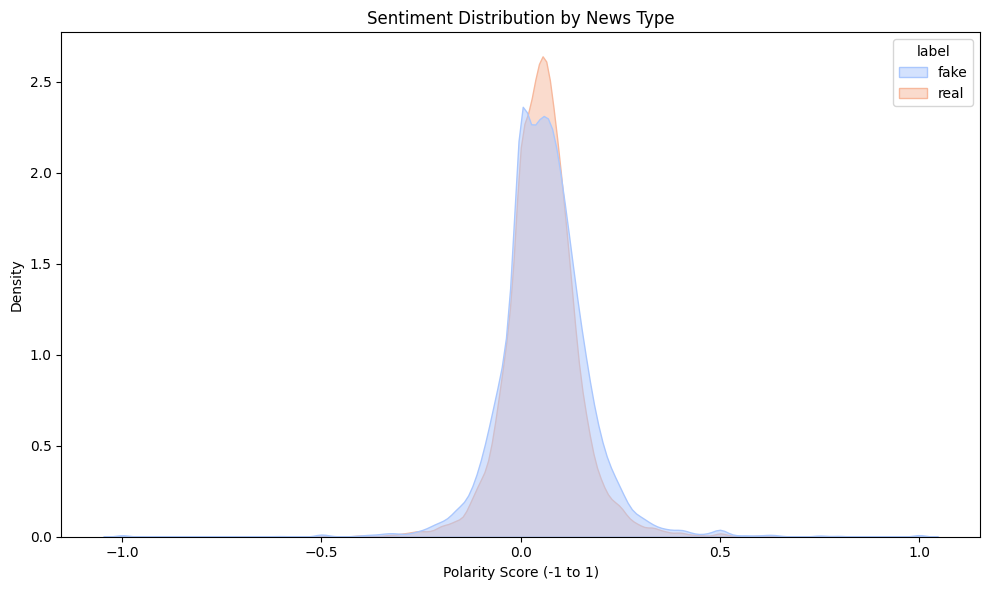

In [19]:
from textblob import TextBlob

data['polarity'] = data['text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='polarity', hue='label', fill=True, palette='coolwarm', alpha=0.5)
plt.title('Sentiment Distribution by News Type')
plt.xlabel('Polarity Score (-1 to 1)')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

In [20]:
# Top words bar plot
from collections import Counter

In [21]:
def get_top_n_words(text, n=20):
    words = text.split()
    most_common = Counter(words).most_common(n)
    return zip(*most_common)

fake_words, fake_counts = get_top_n_words(fake_cleaned)
real_words, real_counts = get_top_n_words(real_cleaned)

<ipython-input-22-e4376156ff7e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(fake_counts), y=list(fake_words), palette='Reds_r')


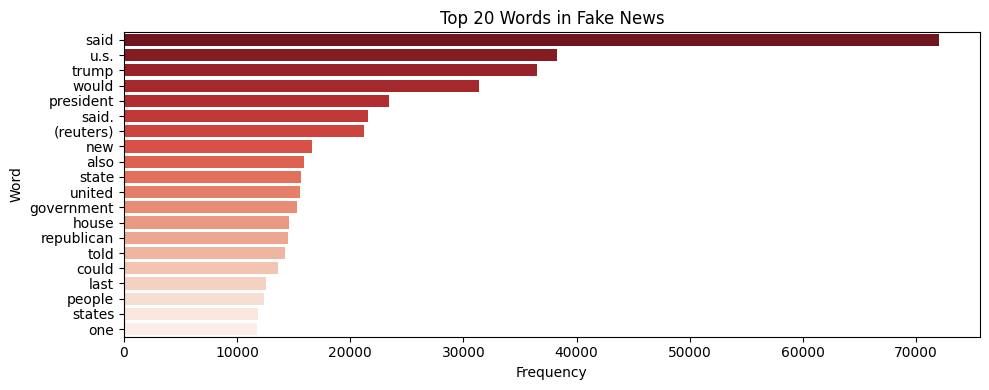

In [22]:
plt.figure(figsize=(10,4))
sns.barplot(x=list(fake_counts), y=list(fake_words), palette='Reds_r')
plt.title("Top 20 Words in Fake News")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.tight_layout()
plt.show()

<ipython-input-23-fbce66decbae>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(real_counts), y=list(real_words), palette='Blues_r')


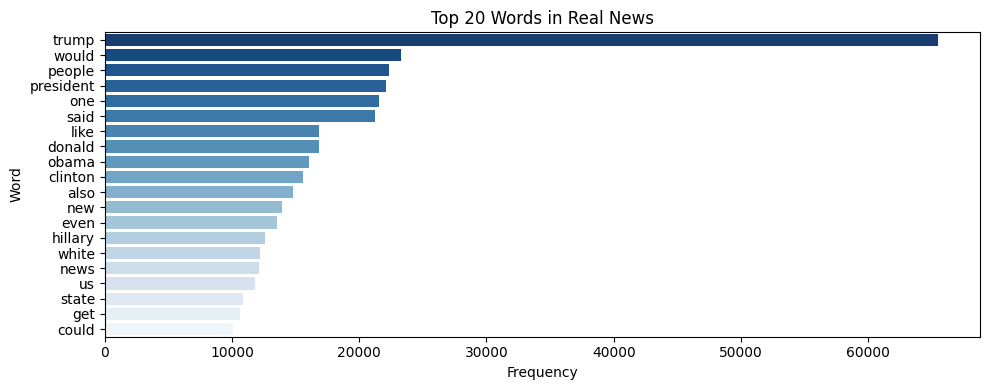

In [23]:
plt.figure(figsize=(10,4))
sns.barplot(x=list(real_counts), y=list(real_words), palette='Blues_r')
plt.title("Top 20 Words in Real News")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.tight_layout()
plt.show()

<ipython-input-24-d88ba8b35fee>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ngrams[1], y=ngrams[0], palette=color)


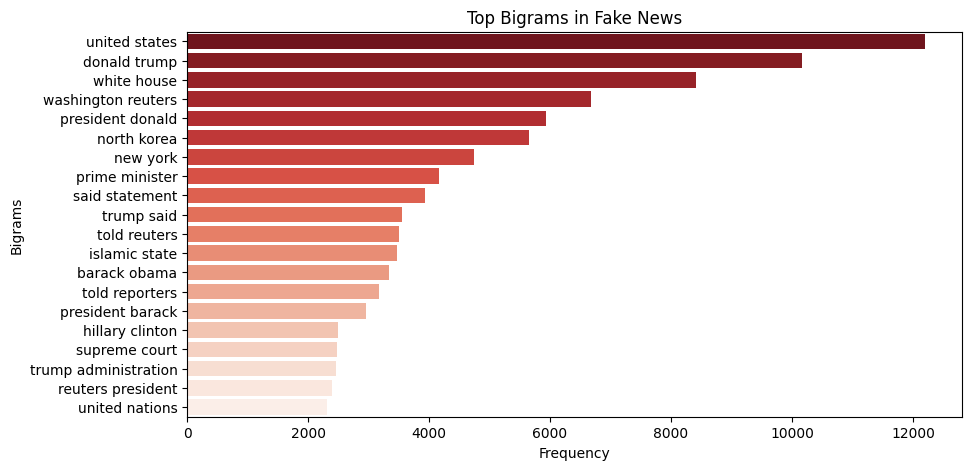

<ipython-input-24-d88ba8b35fee>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ngrams[1], y=ngrams[0], palette=color)


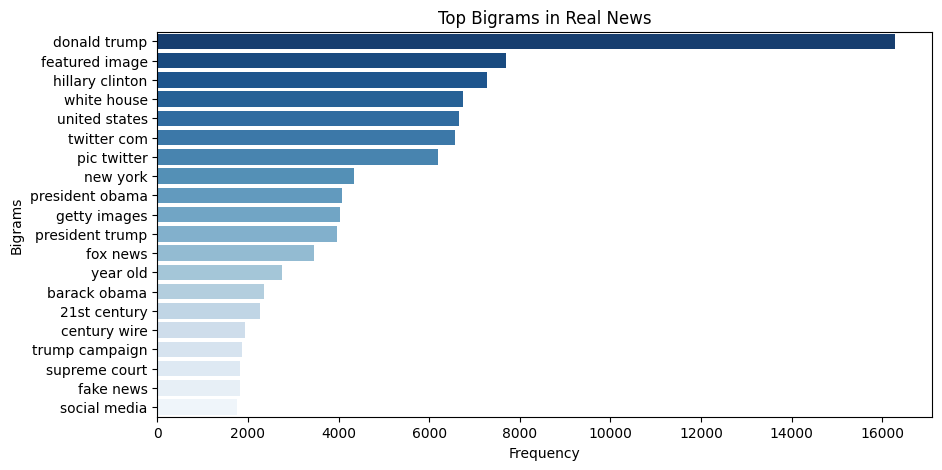

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

def get_ngrams(texts, n=2, top_k=20):
    vec = CountVectorizer(ngram_range=(n, n), stop_words='english').fit(texts)
    bag = vec.transform(texts)
    sum_words = bag.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:top_k]

fake_bigrams = get_ngrams(df['text'], n=2)
real_bigrams = get_ngrams(df2['text'], n=2)

# Plot top bigrams
def plot_ngrams(ngrams, title, color):
    ngrams = list(zip(*ngrams))
    plt.figure(figsize=(10, 5))
    sns.barplot(x=ngrams[1], y=ngrams[0], palette=color)
    plt.title(title)
    plt.xlabel("Frequency")
    plt.ylabel("Bigrams")
    plt.show()

plot_ngrams(fake_bigrams, "Top Bigrams in Fake News", "Reds_r")
plot_ngrams(real_bigrams, "Top Bigrams in Real News", "Blues_r")